In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

def pad_image(image):
    return np.pad(image, ((2, 2), (2, 2)), 'constant')


# Requires 4 pixels of padding on because size of images are 28x28 pixels
x_test_padded = np.array([pad_image(img) for img in x_test])

x_test_padded = x_test_padded.astype('float32') / 255.0

In [25]:
model = tf.keras.models.load_model('lenet5.keras')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [39]:
loss, acc = model.evaluate(x_test_padded, y_test)
print(f"Accuracy: {acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9852
Accuracy: 0.9851999878883362


1/1 [==============================] - 0s 22ms/step
[[1.9499030e-06 4.2157435e-01 9.7072235e-04 2.1320292e-04 4.3221628e-03
  3.0557916e-01 7.2331779e-04 2.6658401e-01 2.4838831e-08 3.1163479e-05]]


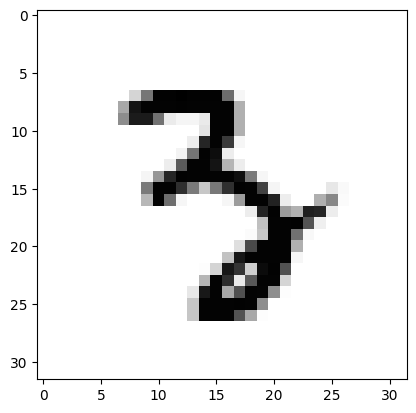

In [40]:
image_index = 87
plt.imshow(x_test_padded[image_index], cmap='Greys')

pred = model.predict(x_test_padded[image_index].reshape(1,32,32,1)/255.0)
print(pred)

313/313 [==============================] - 0s 1ms/step


2024-06-19 16:07:18.806742: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


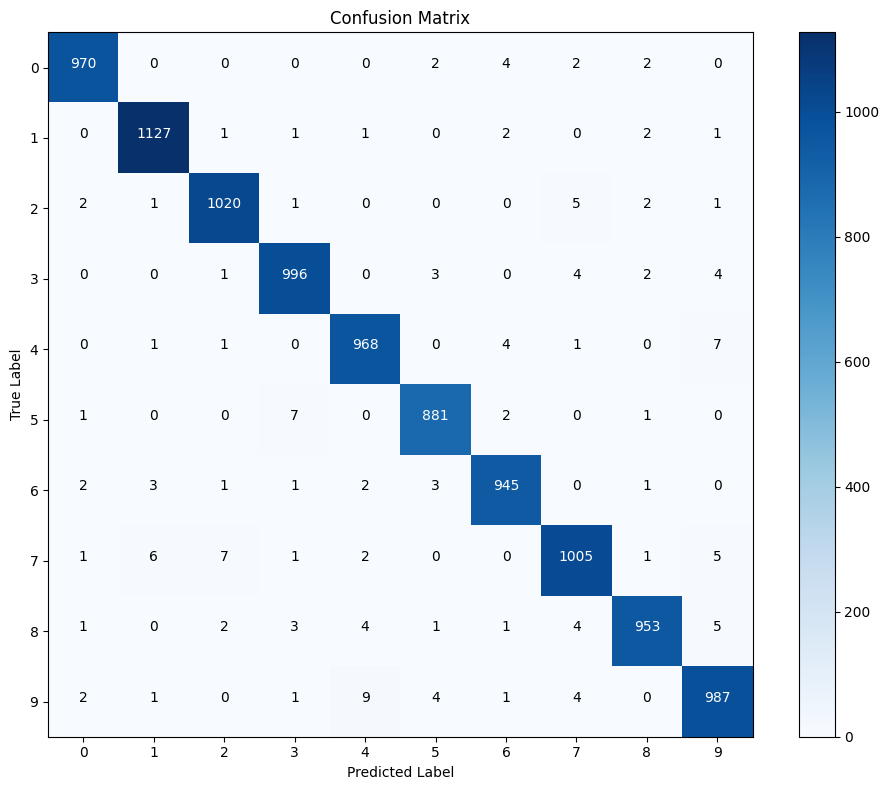

In [45]:
x_test_padded = np.expand_dims(x_test_padded, axis=-1)

# Make predictions on the entire test set
y_pred = model.predict(x_test_padded)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_test, y_pred_classes)

# Convert the confusion matrix to numpy array
cm = cm.numpy()

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add numbers to each cell in the confusion matrix
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()